# 크롤링 : 대구에서 인파가 몰리는 핫플레이스 탐색
---

In [41]:
#!pip install webdriver-manager

In [42]:
# 블로그 검색 함수
def	blog_search(keyword):
    # 모듈설치
    import selenium
    from selenium.webdriver.chrome.service import Service
    from webdriver_manager.chrome import ChromeDriverManager
    from	bs4	import	BeautifulSoup
    import	requests
    from	itertools import count
    from	selenium import	webdriver
    from	konlpy.tag import Okt
    from	collections import Counter
    from	wordcloud import WordCloud
    import	matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    from urllib.request import urlopen
    import platform
    import pandas as pd
    import re
    okt = Okt()
    
    blog_title_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    for i in range(1,10):
        wd	= webdriver.Chrome(service=Service(ChromeDriverManager().install()))
        main_url =f"https://section.blog.naver.com/Search/Post.naver?pageNo={i}&rangeType=ALL&orderBy=sim&keyword={keyword}" 

        wd.get(main_url)	
        
        html	=	wd.page_source
        soupData =	BeautifulSoup(html,	'html.parser')
        blog_title =	soupData.find_all('span',	{'class':'title'})
        
        for i in range(7):
            blog_title_text.append(blog_title[i].text)
        
        for data in blog_title_text:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    if keyword in word:
                        continue
                    elif '여행' in word:
                        continue
                    else:
                        noun_list.append(word)
        wd.quit()
        
    counts	= Counter(noun_list)
    tags	= counts.most_common(30)
    
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		#	Mac	OS
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc = WordCloud(font_path=path,	background_color='white',	width=800,	height=600, random_state = 30)
    print(dict(tags))
    cloud =	wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(12,	8))
    #plt.text(x=800, y = 300 ,s= f'<-{keyword}', color = 'black', fontsize = 30)
    #plt.title(f'[{keyword}]', size=40)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show() 
    return(tags)    

{'대구': 336, '핫': 321, '레이스': 314, '카페': 100, '맛집': 70, '커피': 46, '베트남': 27, '앞산': 25, '칠곡': 23, '수성구': 19, '곳': 19, '수성': 18, '못': 18, '뭄뭄': 18, '중식': 15, '메뉴': 15, '술집': 14, '베리': 14, '이색': 14, '루프': 12, '탑': 12, '단풍': 12, '교동': 12, '마루': 12, '추천': 12, '아눅': 11, '여기': 11, '삼덕동': 10, '음료': 9, '온': 9}


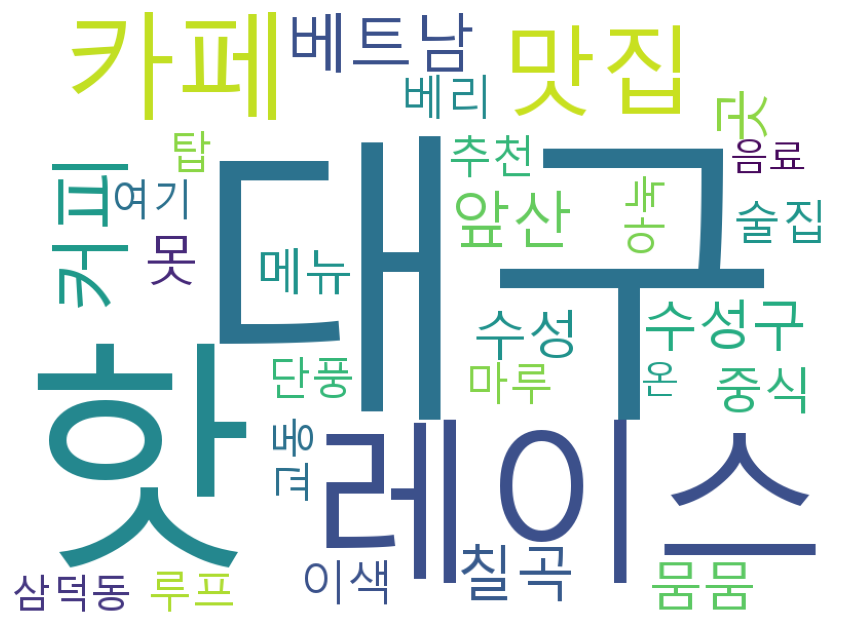

[('대구', 336),
 ('핫', 321),
 ('레이스', 314),
 ('카페', 100),
 ('맛집', 70),
 ('커피', 46),
 ('베트남', 27),
 ('앞산', 25),
 ('칠곡', 23),
 ('수성구', 19),
 ('곳', 19),
 ('수성', 18),
 ('못', 18),
 ('뭄뭄', 18),
 ('중식', 15),
 ('메뉴', 15),
 ('술집', 14),
 ('베리', 14),
 ('이색', 14),
 ('루프', 12),
 ('탑', 12),
 ('단풍', 12),
 ('교동', 12),
 ('마루', 12),
 ('추천', 12),
 ('아눅', 11),
 ('여기', 11),
 ('삼덕동', 10),
 ('음료', 9),
 ('온', 9)]

In [44]:
blog_search('대구 핫플레이스')